--- 
Project for the course in Computational Statistics | Summer 2021, M.Sc. Economics, Bonn University | [Philipp Schreiber](https://github.com/pcschreiber1)

# Variable Selection with High-Dimensional Low-Quality Data
## A comparison of LASSO and Random Forest. <a class="tocSkip">   
    
    
---

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item">
<li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li>
    
<li><span><a href="#2.-Theoretical-Background" data-toc-modified-id="2.-Theoretical-Background-2">2. Theoretical Background</a></span></li>
    
<div class="toc"><ul class="toc-item">
<li><span><a href="#2.1-A-Labour-Market-Model-of-Rural-Urban-Migration" data-toc-modified-id="2.1-A-Labour-Market-Model-of-Rural-Urban-Migration-2">2.1 A Labour Market Model of Rural-Urban Migration</a></span></li>
</ul>
    
<li><span><a href="#3.-Data" data-toc-modified-id="3.-Data-3">3. Data</a></span></li>
    
<div class="toc"><ul class="toc-item">
<li><span><a href="#3.1-Urbanization" data-toc-modified-id="3.1-Urbanization-3">3.1 Urbanization</a></span></li>

<li><span><a href="#3.2-Income" data-toc-modified-id="3.2-Income-3.2">3.2. Income</a></span></li>
</ul>

<li><span><a href="#4.-Identification-&amp;-Estimation" data-toc-modified-id="4.-Identification-&amp;-Estimation">4. Identification &amp; Estimation</a></span>

<div class="toc"><ul class="toc-item">
<li><span><a href="#4.1-Fixed-Effects-(Extension)" data-toc-modified-id="4.1-Fixed-Effects-(Extension)-4.1">4.1 Fixed Effects (Extension)</a></span></li>

<li><span><a href="#4.2-Climate-Change-and-Urbanization" data-toc-modified-id="4.2-Climate-Change-and-Urbanization-4.2">4.2 Climate Change and Urbanization</a></span></li>
    
<li><span><a href="#4.3-Causal-Mechanisms" data-toc-modified-id="4.3-Causal-Mechanisms-4.3">4.3 Causal Mechanisms</a></span></li>    

<ul class="toc-item">
<li><span><a href="#Climate-change-and-city-income" data-toc-modified-id="Climate-change-and-city-income-4.3">Climate change and city income</a></span></li>

<li><span><a href="#Climate-change-and-conflict" data-toc-modified-id="Climate-change-and-conflict-4.3">Climate change and conflict</a></span></li>
</ul></ul>
    
<li><span><a href="#5.-Spatiallay-Explicity-Counterfactual-Analysis-(Extension)" data-toc-modified-id="5.-Spatiallay-Explicity-Counterfactual-Analysis-(Extension)-5">5. Spatially Explicit Counterfactual Analysis</a></span>
    
<div class="toc"><ul class="toc-item">
<li><span><a href="#5.1-Spatial-Identification-(Extension)" data-toc-modified-id="5.1-Spatial-Identification-(Extension)-5.1">5.1 Spatial Identification (Extension)</a></span></li>

<li><span><a href="#5.2-Spatial-Simulation-Study-(Extension)" data-toc-modified-id="5.2-Spatial-Simulation-Study-(Extension)-5.2">5.2 Spatial Simulation Study (Extension)</a></span></li>
    
<li><span><a href="#5.3-Spatial-Patterns-in-Henderson-et-al.-(2017)-(Extension)" data-toc-modified-id="5.3-Spatial-Patterns-in-Henderson-et-al.-(2017)-(Extension)-5.3">5.3 Spatial Patterns in Henderson et al. (2017) (Extension)</a></span></li>  

<ul class="toc-item">
<li><span><a href="#Spatial-Exploratory-Analysis-(Extension)" data-toc-modified-id="Spatial-Exploratory-Analysis-(Extension)">Spatial Exploratory Analysis (Extension)</a></span></li>

<li><span><a href="#Spatially-Explicit-Model-(Extension)" data-toc-modified-id="Spatiall-Explicit-Model-(Extension)">Spatially Explicit Model (Extension)</a></span></li>
</ul></ul>

<li><span><a href="#6.-Conclusion" data-toc-modified-id="7.-Conclusion-7">6. Conclusion</a></span></li>
    
<li><span><a href="#7.-References" data-toc-modified-id="8.-References-8">7. References</a></span></li></div>

In [ ]:
#Imports
library(MASS)
library(Matrix)
library(glmnet) # for LASSO
library(RCpp) #for VSURF
library(VSURF)
library(stats) #for fast toeplitz Matrix

In [237]:
#Import auxiliary functions
source("auxiliary_functions.R", local=FALSE)

set.seed(456)

---
## 1. Introduction
---

---
## 2 Variable Selection
---

### 2.1 LASSO

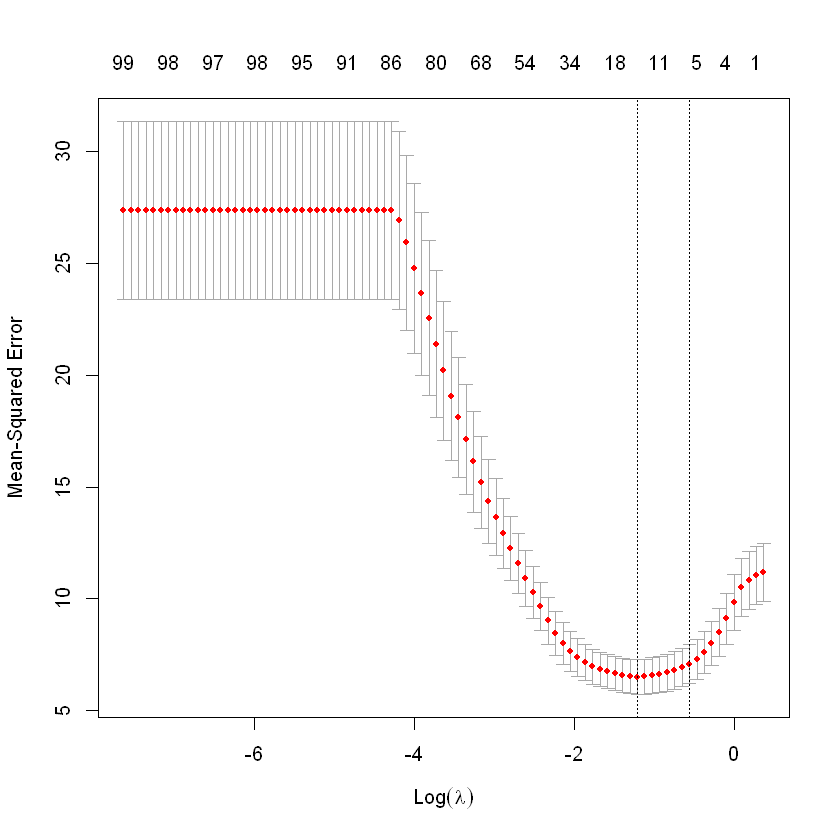

In [151]:
beta = beta_1(p=100,s=5)
df <- simulate(n=100, p=100, rho=0.5, beta=beta, SNR = 1)$df
x <- data.matrix(df[,-1]) #explan var, glmnet can't use dataframe
y <- data.matrix(df[,1]) #dependent var, glmnet can't use dataframe

cv.out = cv.glmnet(x, y, alpha = 1, intercept=FALSE) # Fit lasso model on training data
plot(cv.out) # Draw plot of training MSE as a function of lambda
lam = cv.out$lambda.1se # Select more conservative lambda for variable selection


lasso_coef = predict(cv.out, type = "coefficients", s = lam) # Display coefficients using lambda chosen by CV

### 2.2 RF

In [246]:
beta = beta_1(p=20,s=5)
df <- simulate(n=100, p=20, rho=0.5, beta=beta, SNR = 1)$df
x <- data.matrix(df[,-1]) #explan var, glmnet can't use dataframe
y <- data.matrix(df[,1]) #dependent var, glmnet can't use dataframe

In [247]:
defaultW <- getOption("warn") 

options(warn = -1) 

practice.vsurf <- VSURF(x=x, y=y, mtry=50)#, parallel=TRUE, ncores=2)

options(warn = defaultW)

Thresholding step
Estimated computational time (on one core): 79 sec.
  |======================================================================| 100%
Interpretation step (on 13 variables)
Estimated computational time (on one core): between 22.7 sec. and  29.2 sec.
  |======================================================================| 100%
Prediction step (on 7 variables)
Maximum estimated computational time (on one core): 14 sec.
  |======================================================================| 100%

In [243]:
names(practice.vsurf)

[1] "varselect.thres"     "varselect.interp"    "varselect.pred"     
 [4] "nums.varselect"      "imp.varselect.thres" "min.thres"          
 [7] "imp.mean.dec"        "imp.mean.dec.ind"    "imp.sd.dec"         
[10] "mean.perf"           "pred.pruned.tree"    "err.interp"         
[13] "sd.min"              "err.pred"            "mean.jump"          
[16] "nmin"                "nsd"                 "nmj"                
[19] "overall.time"        "comput.times"        "RFimplem"           
[22] "ncores"              "clusterType"         "call"

In [248]:
practice.vsurf$varselect.pred

[1]  6 15 10 20 18  1

In [249]:
beta = beta_1(p=20,s=5)
beta[practice.vsurf$varselect.pred]

[1] 1 1 1 1 0 1

### 2.3 Measures

---
## 3. Simulation Study
---

### 3.1 Set-up

We stipulte a sparse, linear data generation process. Importantly, due to the linearity - direct comparisons of the prediction error of the LASSO and the RF are not very useful. Instead, what is of interest to us is the relative performance for varying levels of data quality.

The model emulates a frequently used DGP popularized by Belloni et al. 2011: the regression model is of the form

$Y = X'\beta_0 + \varepsilon$

The variables of interest are:
 - n observations to n predictors
 - number of non-zero coefficients
 - size of coefficients
 - signal to noise ratio !
 - Distribution of the error terms (?)

In [58]:
snr.vec = exp(seq(log(0.05),log(6),length=10)) # Signal-to-noise ratios 

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.9248779,0.7619444,-0.2366887,-0.79932017,-0.6172409,-0.9373001,-0.714218525,1.4951783,-0.6596612,1.1498532,⋯,0.54654377,-0.13291029,0.08653444,-0.4009254,-0.3048933,-0.5012653,0.37030820,1.7107204,1.4405938,-0.5308745
2,2.5116256,0.5828483,1.1390493,-0.92183201,0.3951035,-1.0418826,-1.009227468,-1.6948442,-0.1588641,0.3452414,⋯,0.22197258,-0.79320079,-0.83313609,-1.4202143,-0.8085460,-1.4040698,-1.24573672,-1.3514573,0.4524767,0.9309521
3,5.5064501,0.1035297,0.1477489,-0.26040352,-0.8502139,0.3901858,0.350025356,1.6869651,1.0923189,0.1336877,⋯,-0.83369935,-0.26781844,-0.77759991,0.9478600,-0.7288411,0.3866305,-0.07580884,-1.8627581,-0.8167242,-0.4621552
4,5.6008446,-1.8982755,-0.5648260,-0.74357150,-1.5031414,-0.2236506,-0.724476973,0.2175986,-0.5081647,-0.3667135,⋯,-2.78077050,-1.47914130,-0.38869625,-2.2413409,-3.0781671,-2.1580112,-2.29214140,0.2416146,0.3167793,0.9344008
5,-0.9134144,-0.1915366,-1.4930770,-1.15816437,0.4741678,-0.5424446,0.006738409,-0.2702731,-0.8488099,-0.1137651,⋯,0.81180008,-0.13713100,0.53721665,1.0061964,0.1874832,0.6573568,-1.02879696,-1.2061697,-0.5152268,0.3913617
6,-1.8885374,-0.3836484,1.0008224,-0.05103593,0.5819881,1.0876057,1.329241854,0.6173043,-0.3106449,-0.1318549,⋯,0.03345994,0.05877391,0.56731354,0.8994046,0.6319639,0.4805077,-0.80918516,-0.1380920,-0.2706493,1.1769617


**Orient correlation coefficient $\rho$ and sample size on application data**

What is my signal to Noise ratio here? $SNR = \frac{var(x'\beta^0)}{\sigma^2}$

### 3.2 Case 1 - Baseline

Looking at the case without special collinearity between the significant coefficients. 

**Measures**
 - retention frequency
 - prediction error

ERROR: Error in enumerate(snr.vec): konnte Funktion "enumerate" nicht finden


In [163]:
snr.vec = exp(seq(log(0.05),log(6),length=10))
for (i in snr.vec){
    print(i)
}

[1] 0.05
[1] 0.08511187
[1] 0.1448806
[1] 0.2466212
[1] 0.4198079
[1] 0.7146126
[1] 1.21644
[1] 2.07067
[1] 3.524773
[1] 6


In [218]:
cv.lasso_2 <- function(data, #data frame - dependent variable first
                     beta # true coefficients
){
  #--------------------------
  # Uses 10 fold CV and uses 1 SE lambda
  # as conservative estimate for variable selection
  # -------------------------
  x <- data.matrix(df[,-1]) #explan var, glmnet can't use dataframe
  y <- data.matrix(df[,1]) #dependent var, glmnet can't use dataframe
  
  cv.out = cv.glmnet(x, y, alpha = 1, intercept=FALSE) # Fit lasso model on training data
  #lam = cv.out$lambda.1se # Select more conservative lambda for variable selection
  lam = cv.out$lambda.min
  
  lasso_coef = predict(cv.out, type = "coefficients", s = lam) # Display coefficients using lambda chosen by CV
  return(var_retention(lasso_coef, beta))
}

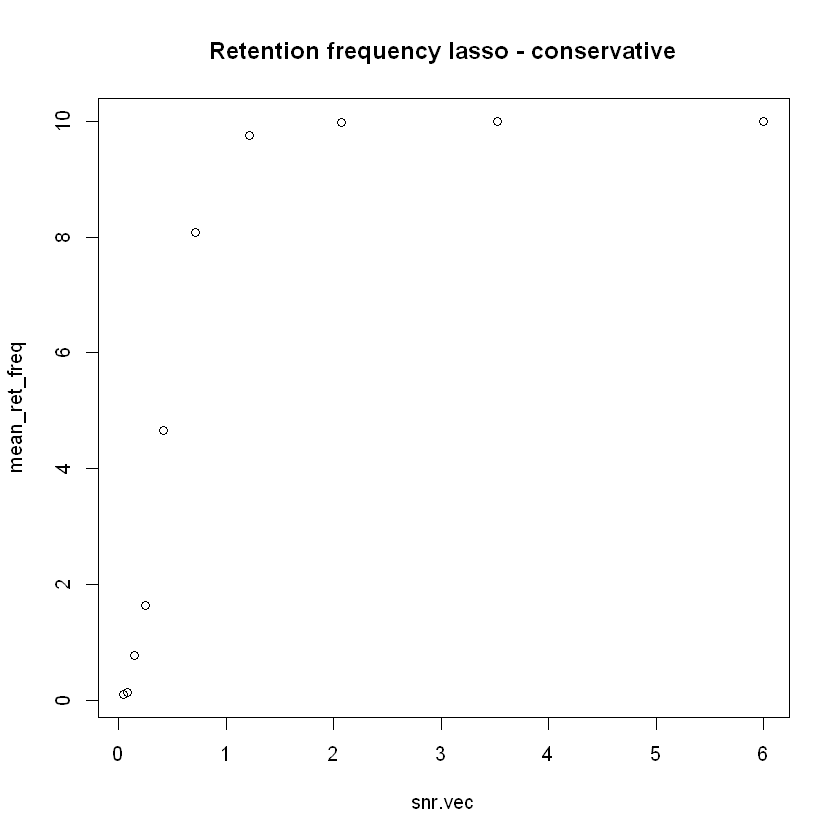

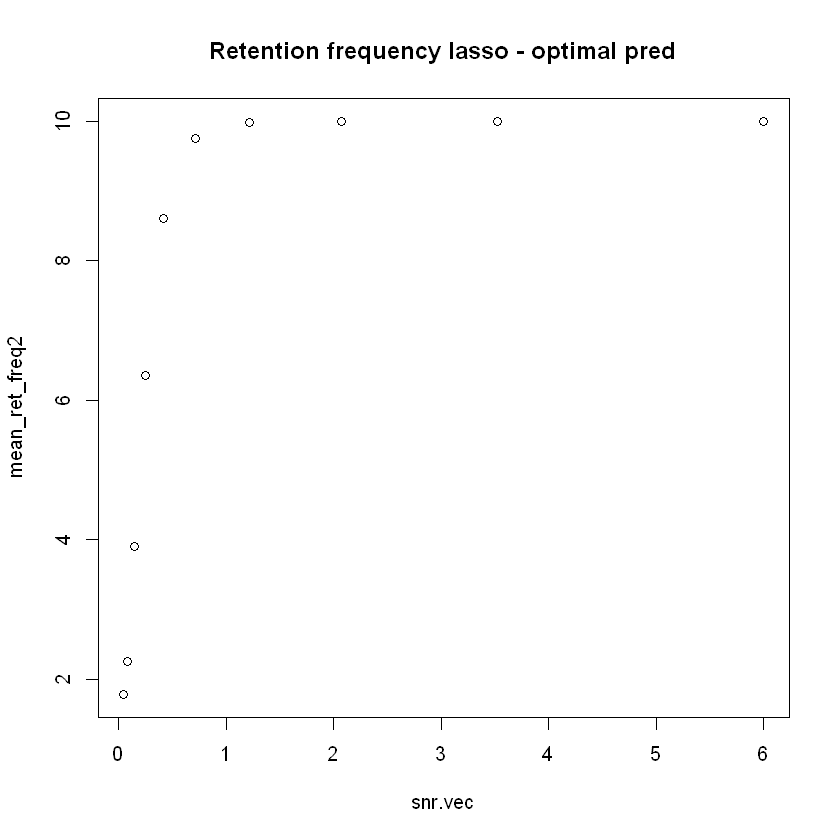

In [238]:
#--------------------------------
# Simulation 1
#--------------------------------

# Number of simulations
n_sim = 100
# Signal-to-noise ratios 
snr.vec = exp(seq(log(0.05),log(6),length=10))
#beta vector
beta = beta_1(p=50,s=5)
#to store results
container = matrix(NaN, ncol=length(snr.vec), nrow=n_sim) # each column corresponds to SNR value
container2 = matrix(NaN, ncol=length(snr.vec), nrow=n_sim) # each column corresponds to SNR value

for (j in 1:length(snr.vec)){
    SNR = snr.vec[j]
    for (i in 1:n_sim){
        df <- simulate(n=100, p=50, rho=0.5, beta=beta, SNR = SNR)$df 
        container[i, j] = cv.lasso(data=df, beta=beta) #obtain retention of lasso
        container2[i, j] = cv.lasso_2(data=df, beta=beta)
    }
}
true_sparsity = length(beta) #sum(beta)# SUM as sparsity measure not correct if true beta not binary

data_container = data.frame(container)
#colnames(data_container) = snr.vec
mean_retention = as.numeric(colMeans(data_container)) #create list of mean values
mean_ret_freq = mean_retention / true_sparsity * 100 # get percentage
plot(snr.vec, mean_ret_freq, main="Retention frequency lasso - conservative")

data_container2 = data.frame(container2)
#colnames(data_container) = snr.vec
mean_retention2 = as.numeric(colMeans(data_container2)) #create list of mean values
mean_ret_freq2 = mean_retention2 / true_sparsity * 100 # get percentage
plot(snr.vec, mean_ret_freq2, main="Retention frequency lasso - optimal pred")


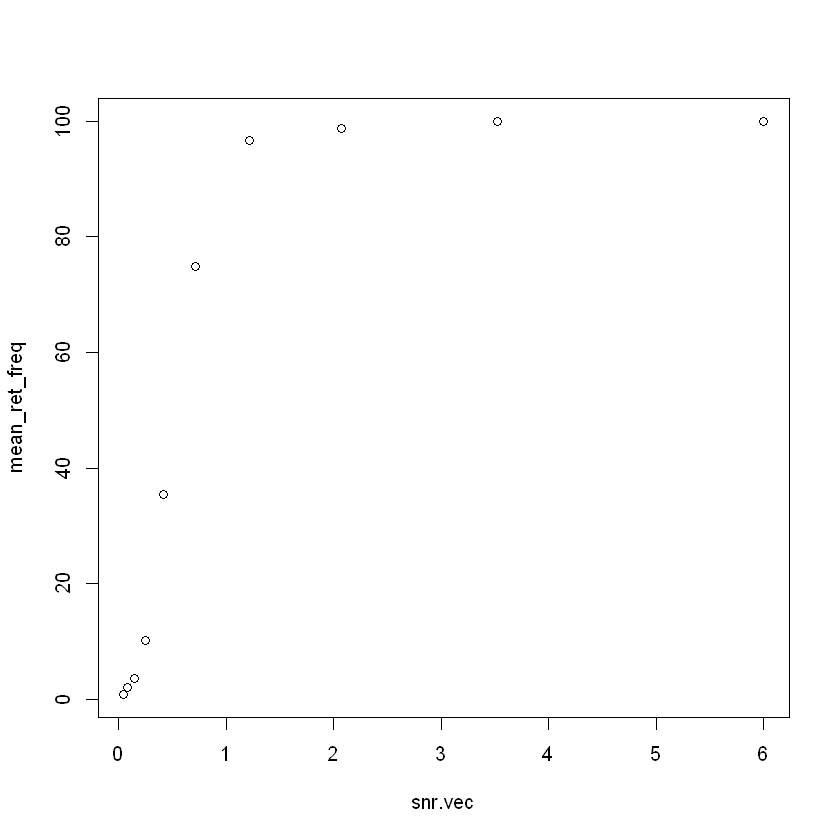

In [186]:
true_sparsity = sum(beta)# SUM as sparsity measure not correct if true beta not binary
data_container = data.frame(container)
#colnames(data_container) = snr.vec
mean_retention = as.numeric(colMeans(data_container)) #create list of mean values
mean_ret_freq = mean_retention / sparsity * 100 # get percentage
plot(snr.vec, mean_ret_freq)

---
## 3. Application
---

---
# Reference Section
---
* Belloni et al 2011